In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(19680801)  # For reproducibility

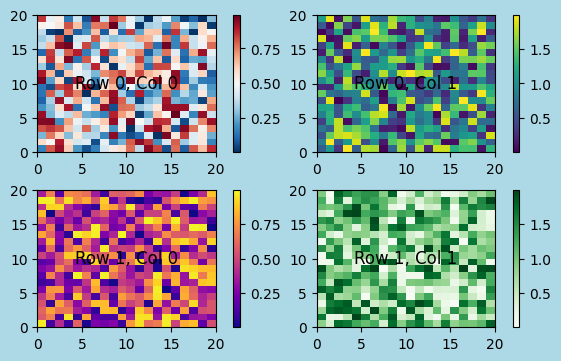

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(5.5, 3.5), layout='constrained', facecolor='lightblue')
cmaps = ['RdBu_r', 'viridis', 'plasma', 'Greens']

for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        ax.annotate(f'Row {row}, Col {col}', xy=(0.5, 0.5), xycoords='axes fraction',
                    ha='center', va='center', fontsize=12, color='black')
        pcm = ax.pcolormesh(np.random.rand(20, 20) * (col + 1), cmap=cmaps[row * 2 + col])
        
        fig.colorbar(pcm, ax=ax)

- The first column has the same type of data in both rows, so it may be desirable to have just one colorbar. We do this by passing Figure.colorbar a list of Axes with the ax kwarg.

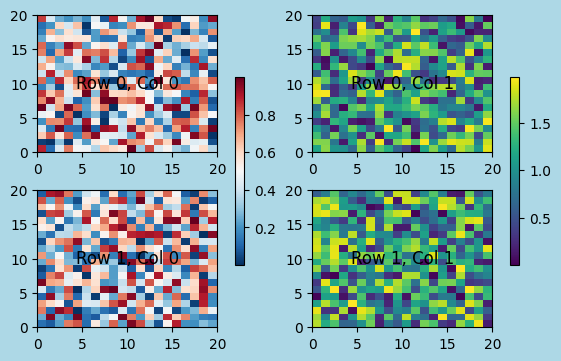

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(5.5, 3.5), layout='constrained', facecolor='lightblue')
cmaps = ['RdBu_r', 'viridis']

for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        ax.annotate(f'Row {row}, Col {col}', xy=(0.5, 0.5), xycoords='axes fraction',
                    ha='center', va='center', fontsize=12, color='black')
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1), cmap=cmaps[col])
        
    fig.colorbar(pcm, ax=axs[:, col], shrink=.6)

- If you want to show a single axis for plots in the same column:

    - utilise the sharex key word argument evaluated to False by default and True otherwise.

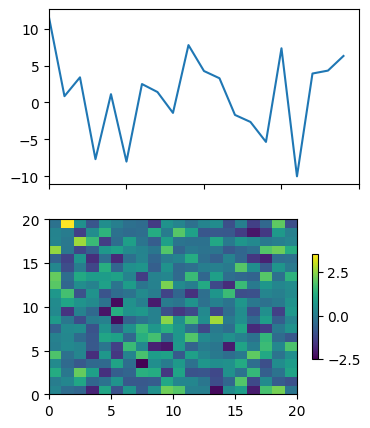

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True)
X = np.random.randn(20, 20)
axs[0].plot(np.sum(X, axis=0))
pcm = axs[1].pcolormesh(X)
fig.colorbar(pcm, ax=axs[1], shrink=0.6)

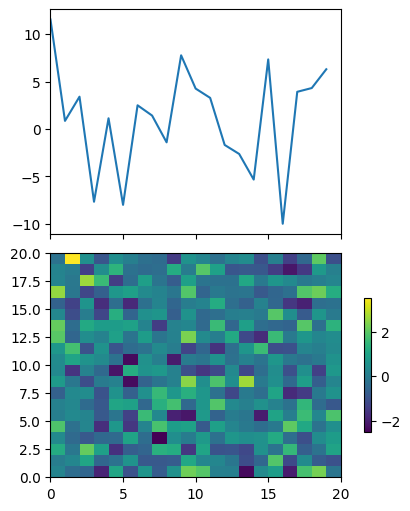

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True, layout='constrained')
axs[0].plot(np.sum(X, axis=0))
pcm = axs[1].pcolormesh(X)
fig.colorbar(pcm, ax=axs[1], shrink=0.6)

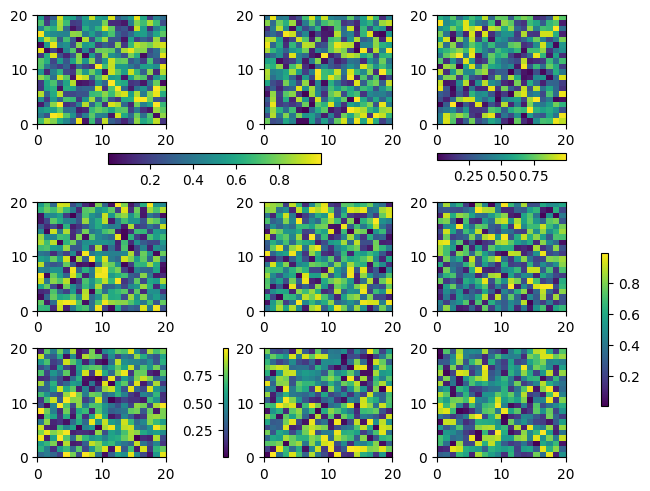

In [19]:
fig, axs = plt.subplots(3, 3, layout='constrained')
for ax in axs.flat:
    pcm = ax.pcolormesh(np.random.random((20, 20)))

fig.colorbar(pcm, ax=axs[0, :2], shrink=0.6, location='bottom')
fig.colorbar(pcm, ax=[axs[0, 2]], location='bottom')
fig.colorbar(pcm, ax=axs[1:, :], location='right', shrink=0.6)
fig.colorbar(pcm, ax=[axs[2, 1]], location='left')

## Adjusting the space between colorbars and parent axes

Text(0.5, 0.98, "layout='constrained'")

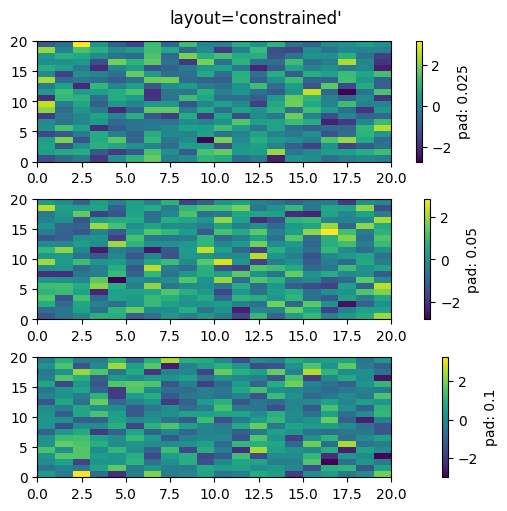

In [20]:
fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}')
fig.suptitle("layout='constrained'")

Text(0.5, 0.98, 'No layout manager')

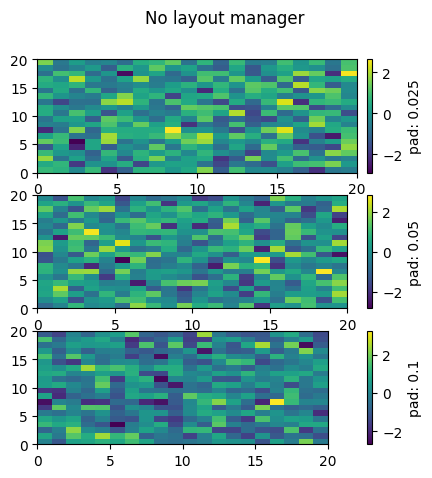

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}')
fig.suptitle("No layout manager")

## Manual Placement of colorbars

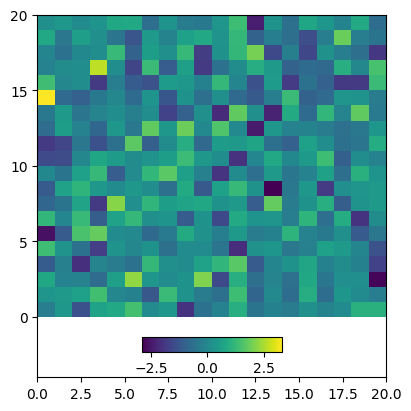

In [22]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([0.3, 0.07, 0.4, 0.04])
fig.colorbar(pcm, cax=cax, orientation='horizontal')

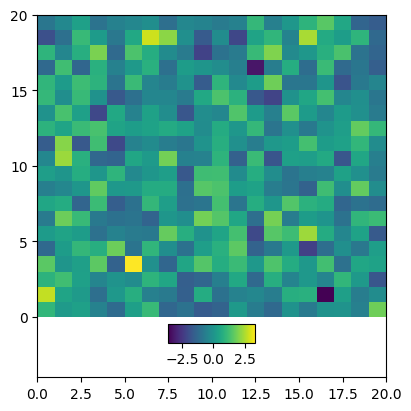

In [23]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([7.5, -1.7, 5, 1.2], transform=ax.transData)
fig.colorbar(pcm, cax=cax, orientation='horizontal')

### Colorbars attached to fixed aspect ratios

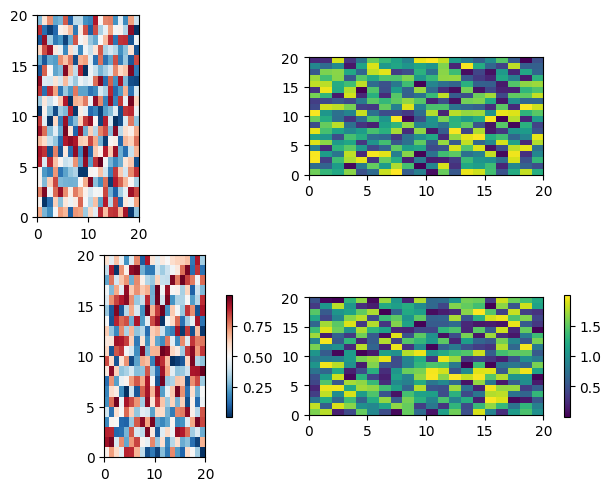

In [24]:
fig, axs = plt.subplots(2, 2,  layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            fig.colorbar(pcm, ax=ax, shrink=0.6)

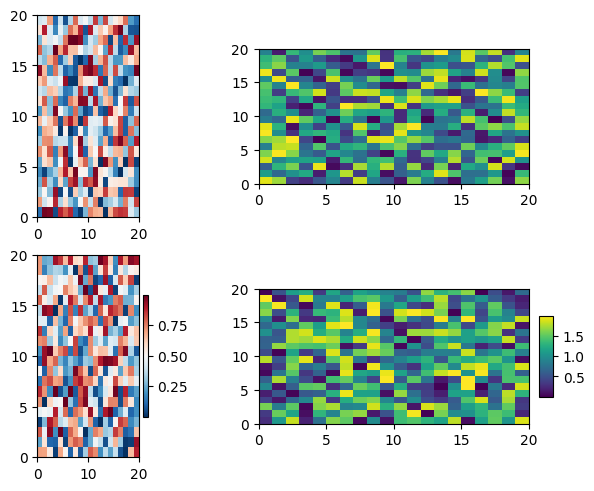

In [25]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            cax = ax.inset_axes([1.04, 0.2, 0.05, 0.6])
            fig.colorbar(pcm, cax=cax)